In [1]:
# import the pandas module
# https://pandas.pydata.org/docs/user_guide/index.html

import pandas as pd

# numpy is a standard module for simple numerical calculations
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import io

In [2]:
df1 = pd.read_csv("CA_13-17.txt",delimiter="\t")
df2 = pd.read_csv("CA_18-23.txt",delimiter="\t")

data_frame = pd.concat([df1,df2], ignore_index = True)

We replace "Unreliable" by NaN.

In [3]:
data_frame = data_frame.replace("2022 (provisional)", "2022")
data_frame = data_frame.replace("2023 (provisional)", "2023")
data_frame[(data_frame["Year Code"] <= 2023)]

,Notes,Year,Year Code,Deaths,Population,Crude Rate
0,NaN,2013.0,2013.0,176.0,38332521.0,0.5
1,NaN,2014.0,2014.0,194.0,38802500.0,0.5
2,NaN,2015.0,2015.0,229.0,39144818.0,0.6
3,NaN,2016.0,2016.0,355.0,39250017.0,0.9
4,NaN,2017.0,2017.0,536.0,39536653.0,1.4
55,NaN,2018,2018.0,865.0,39557045.0,2.2
56,NaN,2019,2019.0,1675.0,39512223.0,4.2
57,NaN,2020,2020.0,4009.0,39368078.0,10.2
58,NaN,2021,2021.0,6060.0,39237836.0,15.4
59,NaN,2022,2022.0,6627.0,39029342.0,17.0


In [4]:
C_All0 = data_frame[(data_frame["Year Code"] <= 2023)][["Year", "Crude Rate"]].astype(float) 
C_All1 = data_frame[(data_frame["Year Code"] < 2020) &
           (data_frame["Notes"] != "Total")][["Year", "Crude Rate"]].astype(float)
C20_All1 = data_frame[(data_frame["Year Code"] >= 2020) &
           (data_frame["Notes"] != "Total")][["Year", "Crude Rate"]].astype(float) 

In [5]:
x_all0 = C_All0["Year"]
x_all1 = C_All1["Year"]
x20_all1 = C20_All1["Year"]
y_all1 = C_All1["Crude Rate"]

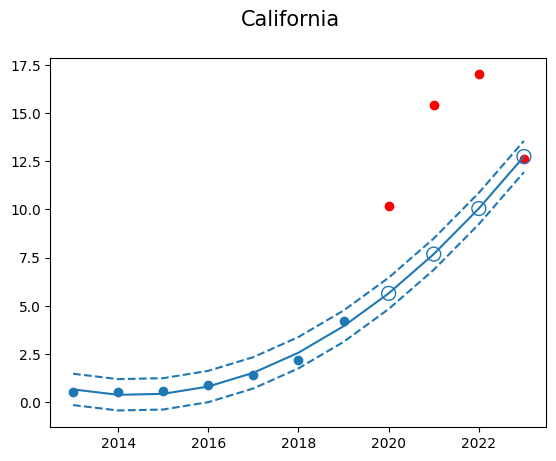

In [6]:
coeff1 = np.polyfit(x_all1, y_all1, 2)
yfit1 = np.polyval(coeff1,x_all1)
res1 = np.sum((y_all1  - yfit1)**2)

std1 = np.sqrt(res1/(len(y_all1)-3))

plt.suptitle('California', fontsize=15)
plt.plot(x_all0, np.polyval(coeff1,x_all0), color= 'tab:blue')
plt.scatter(x_all1, y_all1, color='tab:blue')
plt.scatter(range(2020,2024), C20_All1["Crude Rate"], color='red')
plt.scatter(range(2020,2024), np.polyval(coeff1, x20_all1), s=100, edgecolors='tab:blue', facecolors='none')
plt.plot(x_all0, np.polyval(coeff1,x_all0)+3*std1, color='tab:blue', linestyle='dashed')
plt.plot(x_all0, np.polyval(coeff1,x_all0)-3*std1, color='tab:blue', linestyle='dashed')

plt.savefig('CA_OldVSNewTrend.svg')